In [1]:
"""
Hello, this code was developed by Lucas Panfilo Donaire, used to study neuron models for my undergraduate thesis in Applied Mathematics, at the São Paulo University (USP).

This code read the results of simulations performed in "simulation.ipynb". This results are stored in PKL format, which is a Python-specific file format for storing variables. 
The variables are stored in the folder "results_data".

Here we found the analysis of distributions of death time of the models. For the powerlaw distributions, we found the data collapse, and universality classes.

Contact: 
lucaspanfilodonaire@gmail.com
lucasdonaire@usp.br
github.com/lucasdonaire
"""

'\nHello, this code was developed by Lucas Panfilo Donaire, used to study neuron models for my undergraduate thesis in Applied Mathematics, at the São Paulo University (USP).\n\nThis code read the results of simulations performed in "simulation.ipynb". This results are stored in PKL format, which is a Python-specific file format for storing variables. \nThe variables are stored in the folder "results_data".\n\nHere we found the analysis of distributions of death time of the models. For the powerlaw distributions, we found the data collapse, and universality classes.\n\nContact: \nlucaspanfilodonaire@gmail.com\nlucasdonaire@usp.br\ngithub.com/lucasdonaire\n'

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from scipy import stats
import powerlaw

C:\Users\ldonaire\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
import pickle
def write_pkl(var,name_file):
    with open(f'results_data\\{name_file}.pkl','wb') as arquivo:
        pickle.dump(var,arquivo)

def read_pkl(name_file):
    with open(f'results_data\\{name_file}.pkl','rb') as arquivo:
        return pickle.load(arquivo)

In [4]:
# functions to test if the data come from exponential distribution
def fit_exp(dados):
    loc, LambdaInv = stats.expon.fit(dados,floc=0)
    return 1/LambdaInv
def test_exp(dados):
    Lambda = fit_exp(dados)
    statistic, p_value = stats.kstest(dados, 'expon', args=(0, 1/Lambda))
    return p_value



# functions to test if the data come from lognormal distribution
def fit_lognorm(dados):
    return stats.lognorm.fit(dados, floc=0)
def test_lognorm(dados):
    shape, loc, scale = fit_lognorm(dados)
    statistic, p_value = stats.kstest(dados, 'lognorm', args=(shape, loc, scale))
    return p_value



# functions to test if the data come from powerlaw distribution
def fit_powerlaw(dados, discreto=False,xmin=None):
    dados = [item for item in dados if item>0]
    if pd.isnull(xmin):
        xmin = min(dados)
    fit = powerlaw.Fit(dados, xmin=xmin, discrete=discreto)
    return fit
def test_powerlaw(dados, discreto=False,xmin=None):
    fit = fit_powerlaw(dados, discreto, xmin)
    empirical_cdf = fit.cdf()
    theoretical_cdf = fit.power_law.cdf()
    ks_stat, p_value = stats.ks_2samp(empirical_cdf[1], theoretical_cdf)
    return p_value

In [7]:
results_GL_U100 = read_pkl('GL_U100')
results_GL_U1000 = read_pkl('GL_U1000')
results_HK_U100 = read_pkl('HK_U100')
results_HK_U1000 = read_pkl('HK_U1000')

## Test distribution of durations

In [8]:
def test_durations(results, plot=False):
    results_dist = {}
    for keyy in list(results.keys()):
        results_dist[keyy] = []
        # print()
        # print(keyy)
        durations = results[keyy][0]
    
        p_value = test_powerlaw(durations, False)
        if p_value >0.05:
            # print(f"POWELAW --- p-value: {p_value}, PL = {p_value>0.05}")
            results_dist[keyy].append('PowerLaw')
            if plot:
                fit = fit_powerlaw(durations,False)
                fig2 = fit.plot_ccdf(color='b', linewidth=2)
                fit.power_law.plot_ccdf(color='black', linestyle='--', ax=fig2)
                plt.title(f'alpha = {keyy} | expoent = {fit.alpha}')
                plt.show()
        
        pvlognorm = test_lognorm(durations)
        if pvlognorm >0.05:
            # print(f"LOGNORM --- p-value: {pvlognorm}, PL = {pvlognorm>0.05}")
            results_dist[keyy].append('LogNorm')
    
        pvexp = test_exp(durations)
        if pvexp >0.05:
            # print(f"EXP --- p-value: {pvexp}, PL = {pvexp>0.05}")
            results_dist[keyy].append('Exp')
            if plot:

                plt.hist(np.array(durations)/np.mean(durations), bins=[item/5 for item in range(15*10)], density=True)
                plt.title(f'alpha = {keyy}')
                plt.plot([item/10 for item in range(151)], np.exp(-np.array([item/10 for item in range(151)])))
                plt.show()

    return {float(key):value for key,value in results_dist.items()}

In [9]:
test_durations(results_GL_U100, False) # output: for each alpha, the distribution. if plot=True, plot the ccdf of powerlaws and pdf of exponentials

{18.5: ['PowerLaw'],
 18.2: ['PowerLaw'],
 17.9: ['PowerLaw'],
 17.6: ['PowerLaw'],
 17.3: ['PowerLaw'],
 17.0: ['PowerLaw'],
 16.7: ['PowerLaw'],
 16.4: ['PowerLaw'],
 16.1: ['PowerLaw'],
 15.8: ['PowerLaw'],
 15.5: ['PowerLaw'],
 15.2: ['PowerLaw'],
 14.9: ['PowerLaw'],
 14.6: ['PowerLaw'],
 14.3: ['PowerLaw'],
 14.0: ['PowerLaw'],
 13.7: ['PowerLaw'],
 13.4: ['PowerLaw'],
 13.1: ['PowerLaw'],
 12.8: ['PowerLaw'],
 12.5: ['PowerLaw'],
 12.2: ['PowerLaw'],
 11.9: ['PowerLaw'],
 11.6: ['PowerLaw'],
 11.3: ['PowerLaw'],
 11.0: ['PowerLaw'],
 10.7: ['PowerLaw'],
 10.4: ['PowerLaw'],
 10.1: ['PowerLaw'],
 9.8: ['PowerLaw'],
 9.5: ['PowerLaw'],
 9.2: ['PowerLaw'],
 8.9: ['PowerLaw'],
 8.6: ['PowerLaw'],
 8.3: ['PowerLaw'],
 8.0: ['PowerLaw'],
 7.7: ['PowerLaw'],
 7.4: ['PowerLaw'],
 7.1: ['PowerLaw'],
 7.0: ['PowerLaw'],
 6.8: ['PowerLaw'],
 6.5: ['PowerLaw'],
 6.2: ['PowerLaw'],
 6.1: [],
 6.0: ['PowerLaw'],
 5.9: [],
 5.8: [],
 5.7: [],
 5.6: [],
 5.5: ['LogNorm'],
 5.4: ['LogNorm'],
 5.

## useful plots

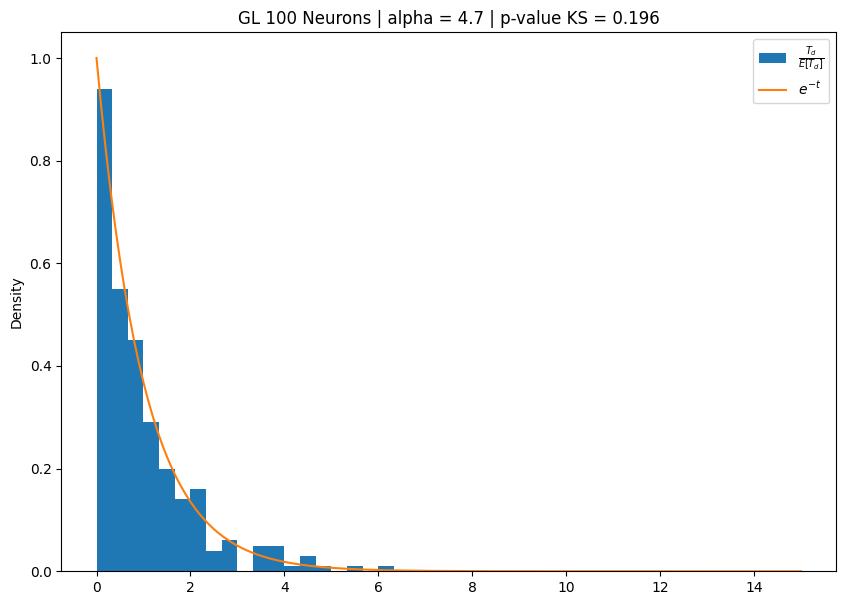

In [10]:
durations = results_GL_U100[4.7][0]
plt.figure(figsize=(10,7))
plt.hist(np.array(durations)/np.mean(durations), bins=[item/3 for item in range(9*5)], density=True,label='$\\frac{T_d}{E[T_d]}$')
plt.plot([item/10 for item in range(151)], np.exp(-np.array([item/10 for item in range(151)])),label='$e^{-t}$')
plt.title(f'GL 100 Neurons | alpha = 4.7 | p-value KS = {np.round(test_exp(durations),3)}')
plt.ylabel('Density')
plt.legend()
plt.show()

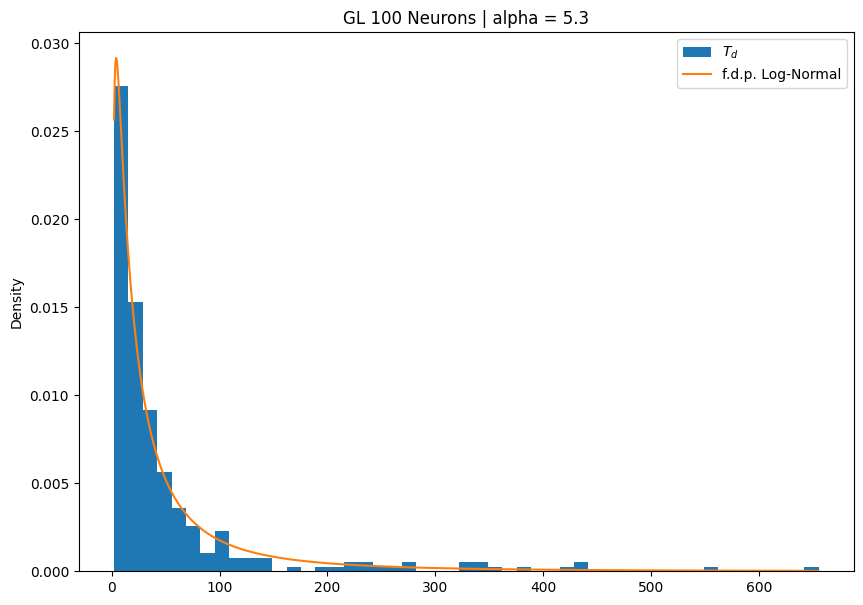

In [11]:
plt.figure(figsize=(10,7))
data_lognorm = results_GL_U100[5.3][0]
shape, loc, scale = fit_lognorm(data_lognorm)
x = np.linspace(min(data_lognorm), np.quantile(data_lognorm, 0.98), 1000)
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)
plt.hist(data_lognorm,bins= np.linspace(min(data_lognorm), np.quantile(data_lognorm, 0.98), 50),density=True,label='$T_d$')
plt.title(f'GL 100 Neurons | alpha = {5.3}')
plt.ylabel("Density")
plt.plot(x, pdf,label='f.d.p. Log-Normal')
plt.legend()

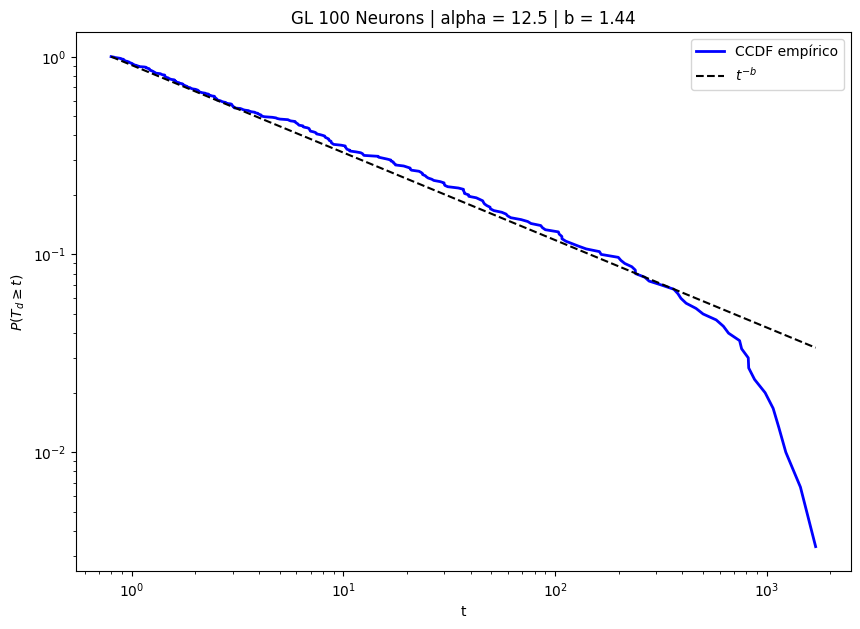

In [12]:
keyy = 12.5
durations = results_GL_U100[keyy][0]
fit = fit_powerlaw(durations,False)
plt.figure(figsize=(10,7))
fig2 = fit.plot_ccdf(color='b', linewidth=2,label='CCDF empírico')
plt.xlabel('t')
plt.ylabel('$P(T_d \geq t)$')
fit.power_law.plot_ccdf(color='black', linestyle='--', ax=fig2, label='$t^{-b}$')
plt.title(f'GL 100 Neurons | alpha = {keyy} | b = {np.round(fit.alpha,2)}')
plt.legend()
plt.show()

# Universality classes

In [13]:
def colapse_powerlaw(results,N=100,CX=1):
    expoents_pl = {}
    xmin_pl = {}
    collapse_pl = {} 
    for keyy in list(results.keys()):
        durations = results[keyy][0]
        p_value = test_powerlaw(durations, False)
        if p_value >0.05:
            fit = fit_powerlaw(durations,False)
            expoents_pl[keyy] = fit.alpha
            xmin_pl[keyy] = fit.xmin
            gamma = -0.5

            x_ccdf, y_ccdf = fit.ccdf()
            x_rescaled = np.array(x_ccdf) / N**CX
            y_rescaled = np.array(y_ccdf) * np.array(x_ccdf)**(gamma)

            collapse_pl[keyy] = [x_rescaled, y_rescaled]

    return [expoents_pl, xmin_pl, collapse_pl]


In [14]:
expoents_pl, xmin_pl, collapse_pl = colapse_powerlaw(results_GL_U100,N=100)
expoents_pl, xmin_pl, collapse_pl2 = colapse_powerlaw(results_GL_U1000,N=1000)
expoents_pl, xmin_pl, collapse_pl3 = colapse_powerlaw(results_HK_U100,N=100)
expoents_pl, xmin_pl, collapse_pl4 = colapse_powerlaw(results_HK_U1000,N=1000)

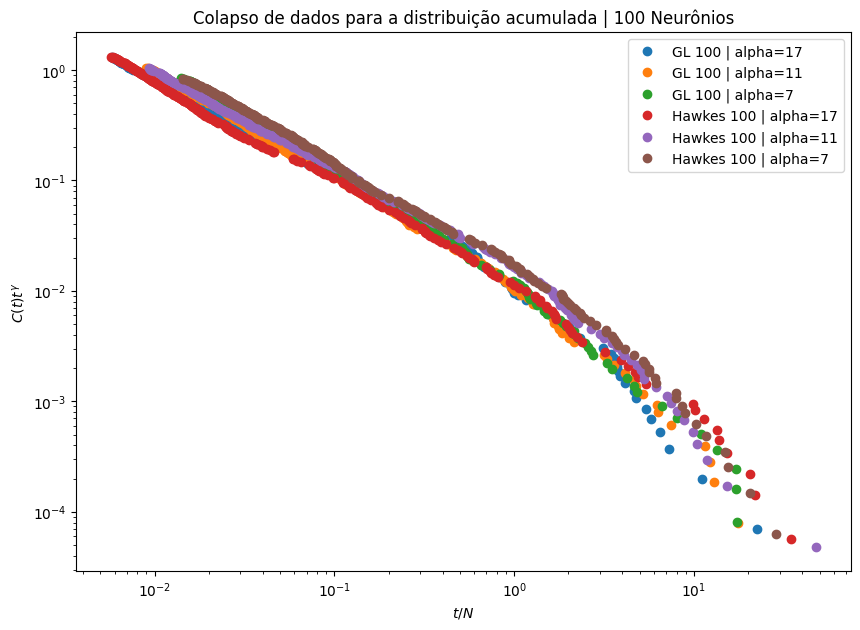

In [15]:
plt.figure(figsize=(10,7))

for key,[x,y] in collapse_pl.items():
    if key in [7.0, 11.0, 17.0]:
        plt.loglog(x,y,label=f"GL 100 | alpha={int(key)}",marker='o', linestyle='None')

for key,[x,y] in collapse_pl3.items():
    if key in [7.0, 11.0, 17.0]:
        plt.loglog(x,y,label=f"Hawkes 100 | alpha={int(key)}",marker='o', linestyle='None')

plt.title("Colapso de dados para a distribuição acumulada | 100 Neurônios")
plt.ylabel('$C(t) t^\gamma$')
plt.xlabel('$t/N$')
plt.legend()

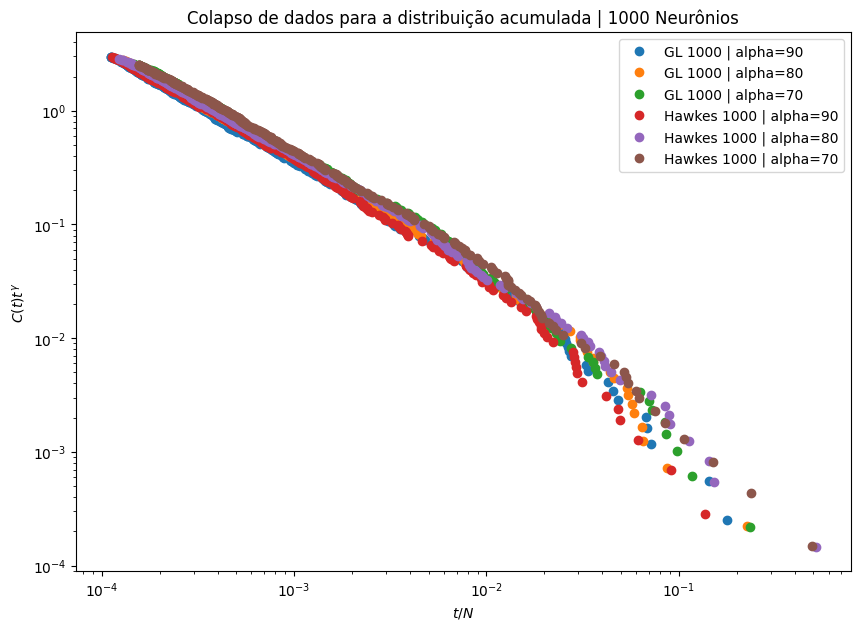

In [16]:
plt.figure(figsize=(10,7))

for key,[x,y] in collapse_pl2.items():
    if key in [70,80,90]:
        plt.loglog(x,y,label=f"GL 1000 | alpha={int(key)}",marker='o', linestyle='None')

for key,[x,y] in collapse_pl4.items():
    if key in [70,80,90]:
        plt.loglog(x,y,label=f"Hawkes 1000 | alpha={int(key)}",marker='o', linestyle='None')

plt.title("Colapso de dados para a distribuição acumulada | 1000 Neurônios")
plt.ylabel('$C(t) t^\gamma$')
plt.xlabel('$t/N$')
plt.legend()

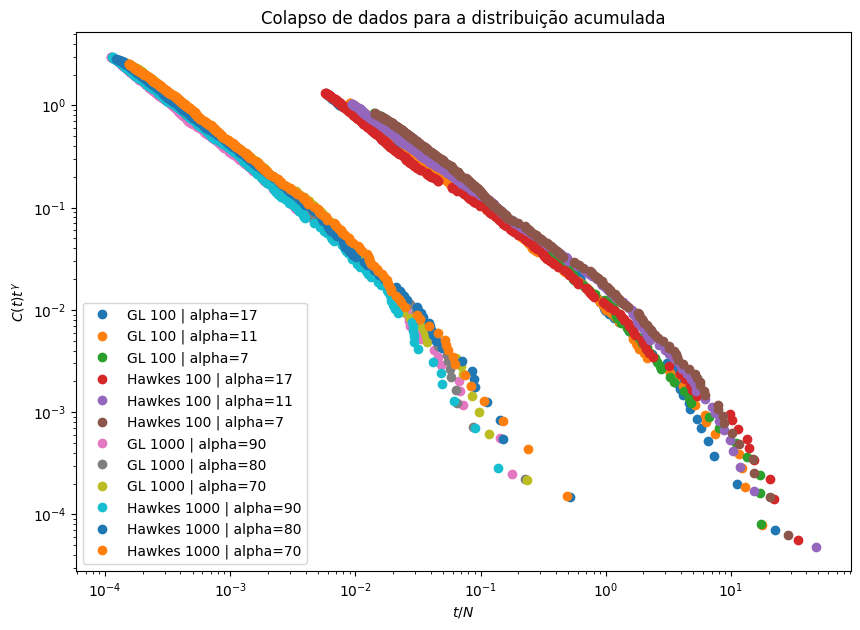

In [17]:
plt.figure(figsize=(10,7))

for key,[x,y] in collapse_pl.items():
    if key in [7.0, 11.0, 17.0]:
        plt.loglog(x,y,label=f"GL 100 | alpha={int(key)}",marker='o', linestyle='None')

for key,[x,y] in collapse_pl3.items():
    if key in [7.0, 11.0, 17.0]:
        plt.loglog(x,y,label=f"Hawkes 100 | alpha={int(key)}",marker='o', linestyle='None')

for key,[x,y] in collapse_pl2.items():
    if key in [70,80,90]:
        plt.loglog(x,y,label=f"GL 1000 | alpha={int(key)}",marker='o', linestyle='None')

for key,[x,y] in collapse_pl4.items():
    if key in [70,80,90]:
        plt.loglog(x,y,label=f"Hawkes 1000 | alpha={int(key)}",marker='o', linestyle='None')

plt.title("Colapso de dados para a distribuição acumulada")
plt.ylabel('$C(t) t^\gamma$')
plt.xlabel('$t/N$')
plt.legend()